<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#课程1---神经网络和深度学习---具有神经网络思维的Logistic回归" data-toc-modified-id="课程1---神经网络和深度学习---具有神经网络思维的Logistic回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>课程1 - 神经网络和深度学习 - 具有神经网络思维的Logistic回归</a></span><ul class="toc-item"><li><span><a href="#导入数据" data-toc-modified-id="导入数据-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#Logistic回归" data-toc-modified-id="Logistic回归-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Logistic回归</a></span></li><li><span><a href="#定义sigmoid函数" data-toc-modified-id="定义sigmoid函数-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>定义sigmoid函数</a></span></li><li><span><a href="#propagate" data-toc-modified-id="propagate-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>propagate</a></span></li><li><span><a href="#optimize" data-toc-modified-id="optimize-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>optimize</a></span></li><li><span><a href="#绘制损失函数图像" data-toc-modified-id="绘制损失函数图像-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>绘制损失函数图像</a></span></li></ul></li></ul></div>

# 课程1 - 神经网络和深度学习 - 具有神经网络思维的Logistic回归

我们要做的事是搭建一个能够**【识别猫】** 的简单的神经网络，你可以跟随我的步骤在Jupyter Notebook中一步步地把代码填进去，也可以直接复制完整代码，在完整代码在本文最底部。

在开始之前，我们有需要引入的库：

- numpy ：是用Python进行科学计算的基本软件包。
- h5py：是与H5文件中存储的数据集进行交互的常用软件包。
- matplotlib：是一个著名的库，用于在Python中绘制图表。
- lr_utils ：在本文的资料包里，一个加载资料包里面的数据的简单功能的库。

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt 
from lr_utils import load_dataset

## 导入数据
导入数据，查看数据的相关信息

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
# 查看数据信息
print("train set x.shape=", train_set_x_orig.shape)
print("train set y.shape=", train_set_y.shape)

print("test set x.shape=", test_set_x_orig.shape)
print("text set y.shape=", test_set_y.shape)

train set x.shape= (209, 64, 64, 3)
train set y.shape= (1, 209)
test set x.shape= (50, 64, 64, 3)
text set y.shape= (1, 50)


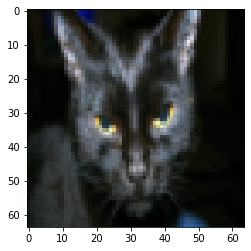

In [5]:
plt.imshow(train_set_x_orig[25])

In [6]:
# 原有的数据为 64*64*3 的矩阵，这里将数据展开为（64*64*3， 1）的向量
# 将训练集数据展开
train_set_x_flatter = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
# 测试集数据展开
test_set_x_flatter = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train set x faltter ", train_set_x_flatter.shape)
print("test set x flatter ", test_set_x_flatter.shape)
# 数据显示训练集 209个训练数据。 测试集有50个测试数据

train set x faltter  (12288, 209)
test set x flatter  (12288, 50)


In [7]:
# 标准化数据
train_set_x = train_set_x_flatter / 255 
test_set_x = test_set_x_flatter / 255 

print(train_set_x)
print(test_set_x)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


## Logistic回归

$$
z^{(i)} = w^{T}x^{(i)} + b \\ 
y^{(i)} = a^{(i)} = simoid(z^{(i)}) \\ 
L(a, y) = -y^{(i)}\log(a^{(i)}) - (1-y^{(i)})log(1-a^{(i)})\\
J(a, y) = \frac{1}{m} \sum_{i=1}^{m} L(a^{(i)}, y{(i)})
$$


## 定义sigmoid函数

$$
g(z) = \frac{1}{1 + e^{-z}} 
$$

In [8]:
def sigmoid(z):
    '''
    Function:
        返回参数Z的sigmoid函数值 
    Parament:
        z - np.array 输入为一维向量 
    Return:
        返回输入向量的sigmoid函数值
    '''
    return 1 / (1 + np.exp(-z))

In [3]:
def initialize_with_zeros(dim):
    '''
    Function:
        初始化参数w、b
    Parament:
        参数w、b的向量维数
    Return:
        对应维度的参数w、b
    '''
    w = np.zeros((dim, 1))
    b = 0 
    assert(w.shape == (dim, 1))
    assert(b == 0)
    
    return (w, b)

## propagate
封装函数，实现向前、向后算法计算相关的变量

In [10]:
def propagate(w, b, X, Y):
    '''
    function:
        实现向前、向后算法的，及其梯度的计算 
    parament:
        w - 权重(列向量) 矩阵形状为(num_px*num_px*3, 1) 
        b - 偏置 1 
        X - 训练数据 矩阵形状为(num_px*num_px*3, 训练量) 
        Y - 真正的数据标签(如果非猫则为0，如果是猫则为1)
    return:
        cost - 计算对数似然函数 
        dw - 参数w的计算梯度 
        db - 参数b的计算梯度 
    '''
    m = X.shape[1] 
    # 向前算法
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y)*np.log(1 - A))
    
    # 反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    # 断言计算参数是否正确
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    return (cost, dw, db)

In [11]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
(cost, dw, db)= propagate(w, b, X, Y)
print(cost)
print(dw)
print(db)

6.000064773192205
[[0.99993216]
 [1.99980262]]
0.49993523062470574


## optimize
此函数通过运行梯度下降算法来优化w和b

In [12]:
def optimize(w , b , X , Y , num_iterations , learning_rate , print_cost = False):
    """
    function:
        此函数通过运行梯度下降算法来优化w和b
    parament：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值
    
    return ：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        (cost, dw, db) = propagate(w, b, X, Y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #记录成本
        if i % 100 == 0:
            costs.append(cost)
        #打印成本数据
        if (print_cost) and (i % 100 == 0):
            print("迭代的次数: %i ， 误差值： %f" % (i,cost))
        
    return (w, b, dw, db, costs)

In [13]:
#测试optimize
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
(w, b, dw, db, costs)= optimize(w, b, X, Y , num_iterations=100, learning_rate=0.009, print_cost = False)
print(w)
print(b)
print(dw)
print(db)

[[0.1124579 ]
 [0.23106775]]
1.5593049248448891
[[0.90158428]
 [1.76250842]]
0.4304620716786828


In [14]:
def predict(w , b , X ):
    """
    function:
        使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，
    parament:
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据
    return :
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）
    
    """
    
    m  = X.shape[1] #图片的数量
    Y_prediction = np.zeros((1,m)) 
    w = w.reshape(X.shape[0],1)
    
    #计预测猫在图片中出现的概率
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        #将概率a [0，i]转换为实际预测p [0，i]
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
    #使用断言
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction


In [15]:
#测试predict
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))


====================测试predict====================
predictions = [[1. 1.]]


In [16]:
def model(X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型
    
    参数：
        X_train  - numpy数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本
    
    返回：
        d  - 包含有关模型信息的字典。
    """
    w , b = initialize_with_zeros(X_train.shape[0])
    
    (w, b, dw, db, costs) = optimize(w , b , X_train , Y_train,num_iterations , learning_rate , print_cost)
    
    #预测测试/训练集的例子
    Y_prediction_test = predict(w , b, X_test)
    Y_prediction_train = predict(w , b, X_train)
    
    #打印训练后的准确性
    print("训练集准确性："  , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100) ,"%")
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    
    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "Y_prediciton_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d

In [17]:
#这里加载的是真实的数据，请参见上面的代码部分。
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

迭代的次数: 0 ， 误差值： 0.693147
迭代的次数: 100 ， 误差值： 0.584508
迭代的次数: 200 ， 误差值： 0.466949
迭代的次数: 300 ， 误差值： 0.376007
迭代的次数: 400 ， 误差值： 0.331463
迭代的次数: 500 ， 误差值： 0.303273
迭代的次数: 600 ， 误差值： 0.279880
迭代的次数: 700 ， 误差值： 0.260042
迭代的次数: 800 ， 误差值： 0.242941
迭代的次数: 900 ， 误差值： 0.228004
迭代的次数: 1000 ， 误差值： 0.214820
迭代的次数: 1100 ， 误差值： 0.203078
迭代的次数: 1200 ， 误差值： 0.192544
迭代的次数: 1300 ， 误差值： 0.183033
迭代的次数: 1400 ， 误差值： 0.174399
迭代的次数: 1500 ， 误差值： 0.166521
迭代的次数: 1600 ， 误差值： 0.159305
迭代的次数: 1700 ， 误差值： 0.152667
迭代的次数: 1800 ， 误差值： 0.146542
迭代的次数: 1900 ， 误差值： 0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


## 绘制损失函数图像

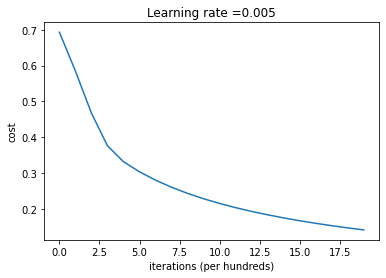

In [18]:
#绘制图
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()